# Exploratory Analysis of Stack Overflow's Yearly Survey 2023.
# (Please note that this is an actively ongoing project, and the current version is a rough draft. At this stage, the bulk of the plots have been included, next I plan to incorporate additional insightful notes and summaries as time permits.)

## Analyzing the Correlation Between Demographics, Mental Health, and Workplace Culture in a Survey of Stack Overflow Members.

  Stack Overflow, founded in 2008, is a website where people ask and answer programming questions to help each other out. It is widely used by programmers of all levels and backgrounds, but it is particularly popular among software developers who work with web development, mobile development, and data science.  It publishes the data of the survey of its members yearly.


# General Demographics Overview
## Age, Gender, Years code, Mental Health , Education Level, Language Used

In [4]:
# This cell is to import need libraries/packages and datasets. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Datasets have been cleaned or set up in previous notebooks.

#df_whole is a copy of the original Data frame, with large amounts of cleaning and parsing to allow for plotting.
df_whole = pd.read_csv("df_whole.csv")
#df_lang is a dataframe modified from df_whole, the answer to the languages used question have been exploaded out to get counts per mention.
df_lang = pd.read_csv("df_lang.csv")
#df_whole_45 is a subset of the original data frame that only includes the top 45 countries by participation.
df_whole_45 = pd.read_csv('df_whole_45.csv')
#df_45 is a new data frame created from df_whole_45 that has means, medians and participation counts for categories grouped by country.
df_45 = pd.read_csv("df_45_clean.csv")
#df_whole_45_salary is a subset of df_whole_45 where salary zeros and  ouliers have been removed, it is about half the size of df_whole_45.
df_whole_45_salary = pd.read_csv("df_whole_45_salary.csv")

#df_whole_45_dev is an uncleaned version of df_whole for looking at the DevOps questions, it has been reduced to only the top 45 coutries
df_whole_45_dev = pd.read_csv("df_whole_45_dev.csv")

#df is the original df.
df = pd.read_csv('data/survey_results_public.csv')


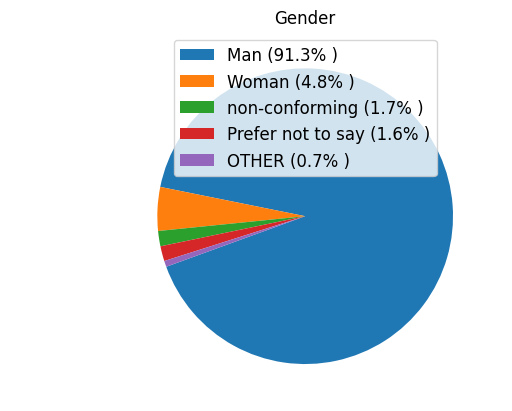

Participation in Gender question is: 70505 / 71331


<Figure size 640x480 with 0 Axes>

In [5]:
#Gender Chart Creation Code:

#df_copy
gender =df_whole.value_counts('Gender')

# Get value counts without the "Man;Woman" category
gender.drop("Man;Woman", inplace=True)

# Function putting counts into percentages
percentages = []
for count in gender:
    percentage = count / sum(gender) * 100
    percentages.append(f'{percentage:.1f}% ')
    
#creating pie chart
plt.pie(gender, labels=gender.index, autopct='', startangle=200, textprops={'color': 'w', 'fontsize': 12})
plt.title('Gender')

# add percentages
plt.legend(labels=[f'{l} ({p})' for l, p in zip(gender.index, percentages)], prop={'size': 12}, loc=9)
# Move legend outside of the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#saving as image- still not working!!!
GenderSOF = plt.savefig('GenderSOF.png')

# Recording participation: 
x = df_whole['Gender'].count()
y = len(df_whole)

print(f'Participation in Gender question is: {x} / {y}')


The gender distribution of the individuals shows 91.3% male identification. This indicates a significant gender disparity within the tech industry, with men being the dominant group. However, it is important to note that this underrepresentation of women in tech is a well-known issue.

Contrary to the observed gender distribution from the SOF data, other reputable sources report a higher percentage of women in the tech industry. According to the National Center for Women & Information Technology (NCWIT) in the United States, women accounted for approximately 26% of the computing workforce in 2020. 

The numbers from SOF are global, and as we will see later are also mostly developers. While there are inumerable reasons for statistics to vary from source to source. This is somethinig to keep in mind when you hear/ see this data used in descision making. (1)(2)(3)

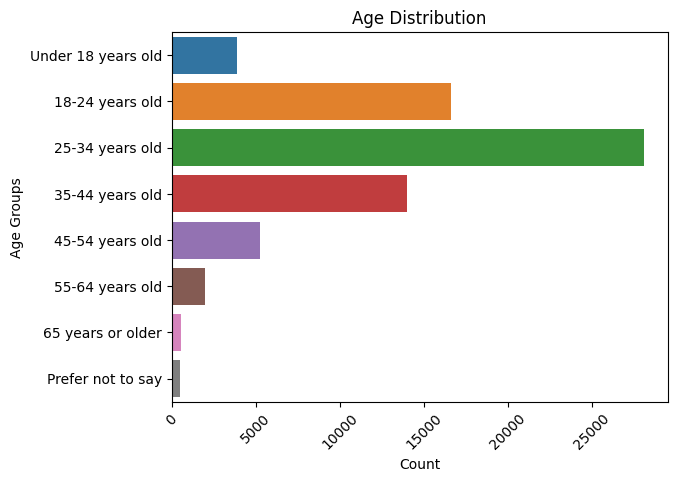

In [6]:
#Age Plot Creation Code:

age_counts = df['Age'].value_counts()

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

sns.barplot(x=age_counts, y=age_counts.index, order=age_order, orient='h')

plt.ylabel('Age Groups')
plt.xlabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

Discussion on age and years code:

12.251307285752338

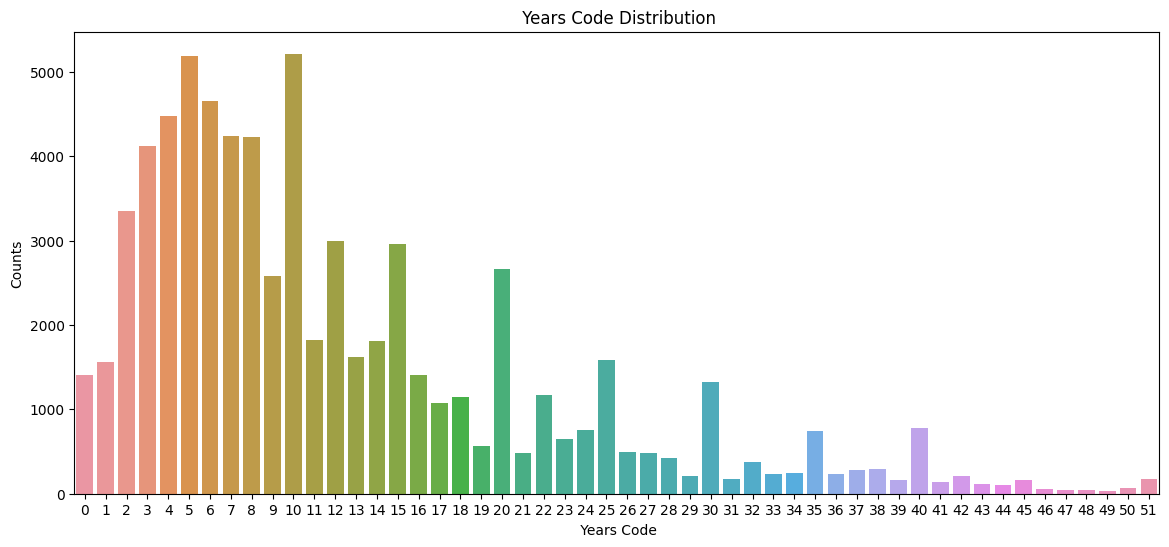

In [7]:
#Years Code Plot Creation Code:
df_whole_45['YearsCode'].unique()
display(df_whole['YearsCode'].mean())
df_whole['YearsCode'].median() 


Years_Code_Counts = df_whole['YearsCode'].value_counts()


# Increase the figure size
plt.figure(figsize=(14, 6))

sns.barplot(y=Years_Code_Counts, x=Years_Code_Counts.index, )


plt.xlabel(' Years Code')
plt.ylabel('Counts')
plt.title(' Years Code Distribution')
#plt.xticks(rotation=45)
plt.show()

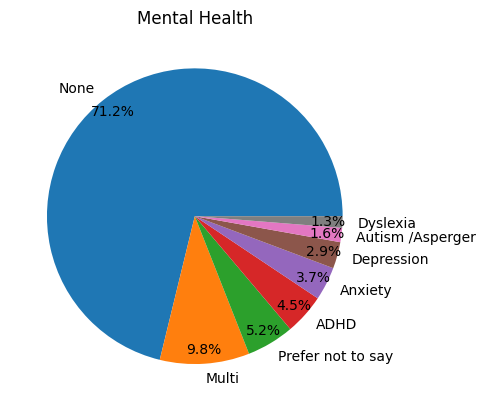

Participation in Mental Health question is: 66198 / 71331


In [8]:
#Mental Health Plot Creation Code:

# create the series
s = df_whole['MentalHealth'].value_counts()

# Get value counts without the "in your own words" category
s.drop("Or, in your own words:", inplace=True)

# plot as a pie chart
plt.pie(s, labels=s.index, autopct='%1.1f%%', pctdistance=.9)
plt.title('Mental Health')
plt.show()

# Recording participation: 
x = df_whole['MentalHealth'].count()
y = len(df_whole)

print(f'Participation in Mental Health question is: {x} / {y}')


Participation in Ed Level question is: 71204 / 71331


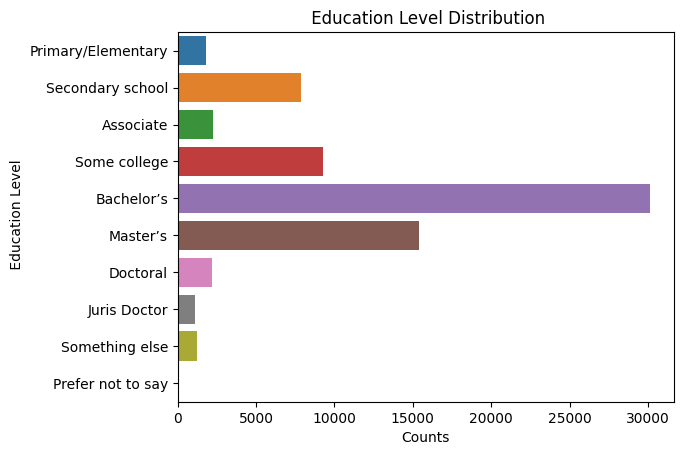

In [9]:
#Education Plot Creation Code:


# Recording participation: 
xx = df_whole['EdLevel'].count()
yy = len(df_whole)

print(f'Participation in Ed Level question is: {xx} / {yy}')

Ed_level_order = [
    'Primary/Elementary',
    'Secondary school',
    'Associate',
    'Some college',
    "Bachelor’s" ,
    "Master’s",
    "Doctoral",
    'Juris Doctor',
    'Something else',
    'Prefer not to say'
]


Ed_Level_Counts = df_whole['EdLevel'].value_counts()


sns.barplot(y=Ed_Level_Counts.index, x=Ed_Level_Counts, order = Ed_level_order, orient='h')

plt.ylabel(' Education Level')
plt.xlabel('Counts')
plt.title(' Education Level Distribution')
plt.show()

Participation in Language Have Worked With question is: 70593 / 71331


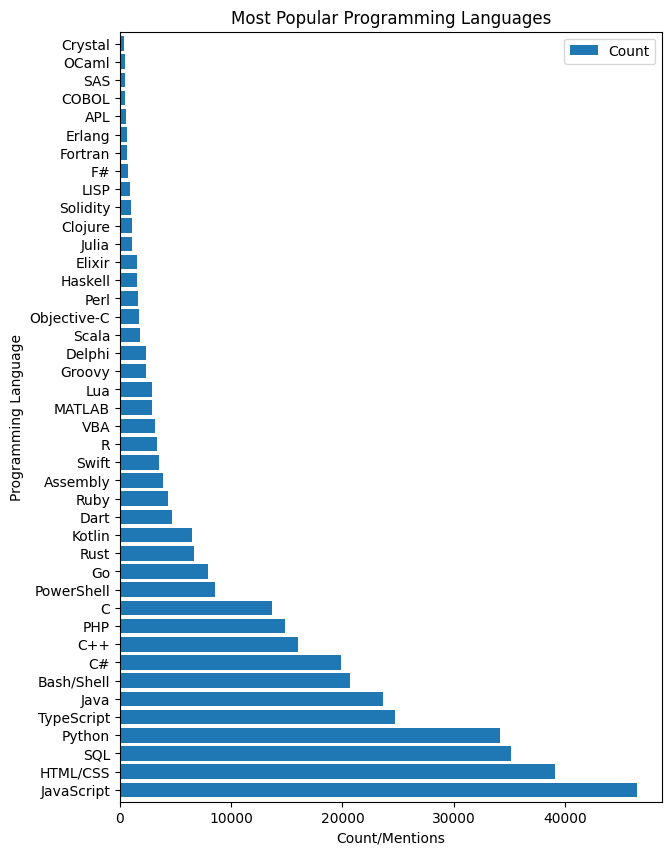

In [10]:
#Popular Programming Languages Plot Creation Code:
# plot the bar graph
df_lang.plot(kind='barh', x='LanguageHaveWorkedWith', y='Count', figsize=(7, 10), width=0.8)

# set the title and labels for the graph
plt.title('Most Popular Programming Languages')
plt.xlabel('Count/Mentions')
plt.ylabel('Programming Language')

# Recording participation:
xxx = df_whole['LanguageHaveWorkedWith'].count()
yyy = len(df_whole)

print(f'Participation in Language Have Worked With question is: {xxx} / {yyy}')

plt.show()

In [11]:
# Count the rows containing 'Developer' in the 'DevType' column
count = df['DevType'].str.contains('Developer').sum()

# Print the count
print(f"Total number of rows containing 'Developer': {count}")

# Count the total number of non-null rows in the 'DevType' column
total_non_na_rows = df['DevType'].count()

# Print the count
print(f"Total number of non-null rows in 'DevType': {total_non_na_rows}")

#Print percent developers

perc = (count/total_non_na_rows)*100

print(f"Percentage Developers: {perc:.2f}%")

Total number of rows containing 'Developer': 51926
Total number of non-null rows in 'DevType': 61302
Percentage Developers: 84.71%


# By Country Demographics Overview
## Age, Years code, Salary , Education Level

In [12]:
df_45



,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
0,USA,13543,58.23%,85.87%,"$149,585.50","$140,000.00",58.91%,15.6,12.0,34.8,Bachelor’s
1,India,6639,39.84%,73.79%,"$19,855.80","$14,579.00",29.13%,7.0,6.0,26.2,Bachelor’s
2,Germany,5395,34.39%,83.97%,"$69,800.20","$66,666.70",49.75%,13.5,10.0,31.4,Master’s
3,UK of GB and N.Ireland,4190,42.85%,85.32%,"$77,805.50","$73,170.70",52.74%,15.7,12.0,33.8,Bachelor’s
4,Canada,2490,62.40%,84.18%,"$88,517.60","$83,608.00",53.53%,14.2,11.0,33.2,Bachelor’s
5,France,2328,23.03%,83.93%,"$53,364.00","$49,462.40",53.61%,12.2,10.0,30.7,Master’s
6,Brazil,2109,66.77%,88.62%,"$31,723.30","$24,000.00",58.27%,11.3,10.0,30.9,Bachelor’s
7,Poland,1732,54.61%,83.83%,"$50,475.50","$44,692.50",54.39%,10.9,9.0,29.3,Master’s
8,Netherlands,1555,18.74%,85.79%,"$70,275.30","$64,516.10",53.50%,14.1,11.0,32.3,Bachelor’s
9,Spain,1521,49.82%,88.95%,"$47,285.90","$43,010.80",55.29%,13.0,10.0,33.0,Bachelor’s


The DataFrame 'DF_45' represents the data cleaned in the "General Demographics by Country" notebook. It focuses on 45 countries with the largest participant counts. The number 45 was chosen arbitrarily to save time during currency conversion. Any country with fewer than 316 participants was excluded, initially there had been 180 countries. This process led to a loss of approximately 12% of the data, primarily from smaller and poorer countries. I apologize for this inconvenience, and in no way say that data is unimportant.

To calculate the mean and median salary, I followed these steps:

1. Create a dictionary of conversion rates. Data was taken from google converter 3/14/2023 and 4/5
2. Apply the conversions to a new column in the DataFrame.
3. Multiply the resulting column by the pay frequency (weekly, monthly, yearly).
4. Remove outliers. 
    - Individuals who provided extreme and erroneous values 
    - Those who didn't understand how to answer the pay frequency question correctly 
    - Those who didn't answer enough questions to calculate the corrected yearly converted salary. 
    - Those that answered $0. 
    - Specifically I Removed 'YearlyTotConvertCOMP' rows **>** average "yearly" pay frequency for each country **<** 1/50th.
    - For a more details on the approach and justification please see the plots in Salary.ipynb and the calculations in General Demographics by Country.ipynb.
    
The intention behind these calculations was to convert the salary into USD for total yearly compensation, accounting for any potential incorrect currency or interval selections.

The shape of the DataFrame initially stood at (64084, 80), comprising a vast population of individuals. However, upon removing outliers, the shape dwindled to (31624, 80), resulting in a staggering loss of participants. Most of these were individuals who decided not to answer by responding with a zero or NA.

While Stack Overflow states that they removed the top 2% of salaries for each country when they did their analysis, I question the sufficiency of this approach. Curiously, their methodology section remains silent on the topic of removing lower bounds for any of the countries. This leaves room for further exploration and scrutiny regarding the handling of outliers in the dataset.(4)

To gain insights into the distribution of reported salaries across different countries, I aim to create individual box and whisker plots for each country and visualize them collectively. 
 

### The rest of the notebook goes through less intensive calculations to gather the following information:
    - Participation Count	
    - % of Participants Who Work Fully Remote & Work Location Participation Count		
    - Mean Years Coding & Years Coding Participation Count
    - Median Years Coding	
    - Mean Age & Age Participation Count
    - Most Common ED Level &  ED Level Participation Count


    


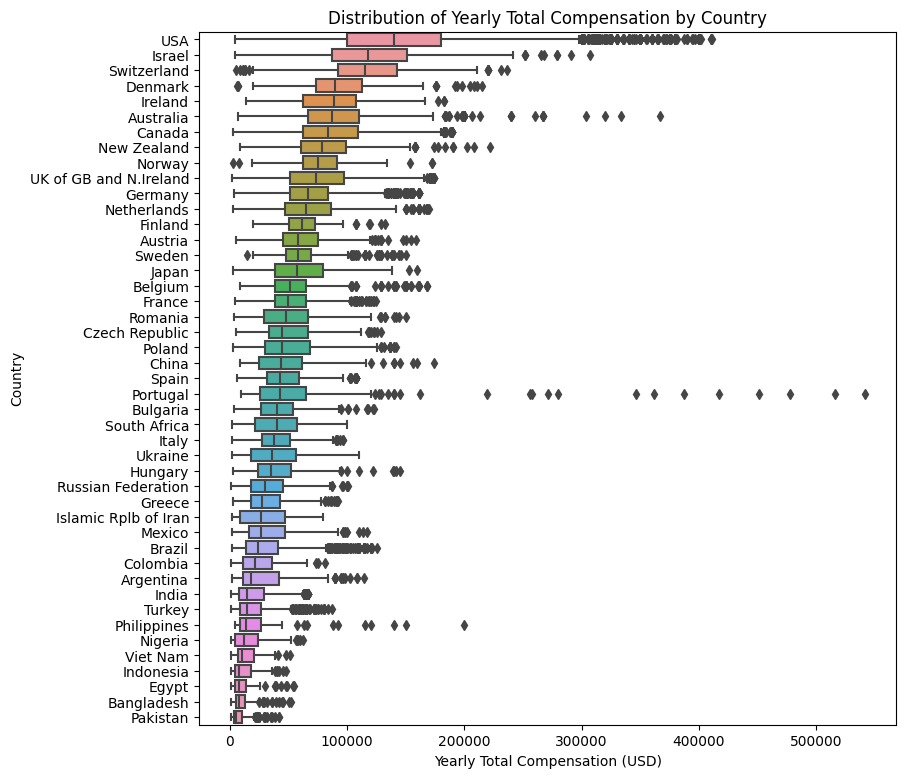

In [13]:
# Calculate the median yearly total compensation for each country
medians = df_whole_45_salary.groupby('Country')['YearlyTotConvertCOMP'].median()

# Sort the countries based on the median values in descending order
sorted_countries = medians.sort_values(ascending=False).index

# Create a new DataFrame containing data only for the sorted countries
df2 = df_whole_45_salary[df_whole_45_salary['Country'].isin(sorted_countries)]

# Plot a boxplot to visualize the distribution of yearly total compensation by country
plt.figure(figsize=(9, 9))
sns.boxplot(data=df2, x='YearlyTotConvertCOMP', y='Country', order=sorted_countries)
plt.xlabel('Yearly Total Compensation (USD)')
plt.ylabel('Country')
plt.title('Distribution of Yearly Total Compensation by Country')
plt.show()

### Here are the top 3 and bottom 3 values when sorting the df_45 data frame by different categories: 

 - Top reported fully Remote Countries vs Countries with the lowest reported Fully Remote workers
 - Highest Average Age countries vs lowest average age countries
 - Highest Average experience level vs lowest average experience levels (Years_code)
 - Median Salary for each country, top 3 highest and bottom 3 lowest
 - % participation or non-NAN responses per total country count
 
 
Note: All columns, except for Work location participation, had similar participation counts, indicating that if respondents answered the salary question, they generally answered the others as well.

#comments on this will be added once the individual salary investigation is complete. I may adjust how I calculate outliers and or how I choose to remove rows from Df_45.

    



In [14]:
# Need to comment out this line when running cell consecutively
df_45['Fully Remote'] = df_45['Fully Remote'].str.replace('%', '').astype(float)

Remote_w_sort = df_45.sort_values('Fully Remote', ascending = False)

Remote_work_high_low = pd.concat([Remote_w_sort.head(3), Remote_w_sort.tail(3)])
Remote_work_high_low['Fully Remote'] = Remote_work_high_low['Fully Remote'].apply(lambda x: '{:.2f}%'.format(x))

Remote_work_high_low


,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
41,Colombia,341,76.51%,87.39%,"$24,651.40","$20,939.00",51.91%,8.9,7.0,29.6,Bachelor’s
24,Ukraine,593,71.92%,83.47%,"$38,837.70","$36,000.00",39.46%,10.3,8.0,29.8,Master’s
6,Brazil,2109,66.77%,88.62%,"$31,723.30","$24,000.00",58.27%,11.3,10.0,30.9,Bachelor’s
15,Switzerland,932,13.01%,87.45%,"$117,535.10","$115,384.60",50.32%,13.9,11.0,32.0,Bachelor’s
34,Norway,479,9.28%,89.98%,"$76,736.80","$74,712.60",60.13%,14.7,12.0,34.1,Master’s
29,Denmark,547,8.26%,86.29%,"$95,477.70","$89,604.70",60.15%,14.9,11.0,33.9,Bachelor’s


In [15]:
Age_sort = df_45.sort_values('Mean Age', ascending = False)

Age_high_low = pd.concat([Age_sort.head(3), Age_sort.tail(3)])
Age_high_low


,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
37,New Zealand,440,33.51,83.41%,"$83,277.80","$78,322.80",57.50%,17.7,13.0,35.2,Bachelor’s
0,USA,13543,58.23,85.87%,"$149,585.50","$140,000.00",58.91%,15.6,12.0,34.8,Bachelor’s
11,Australia,1462,36.28,83.52%,"$93,856.40","$86,666.70",53.35%,16.5,13.0,34.7,Bachelor’s
19,Pakistan,711,28.03,81.29%,"$8,144.10","$5,203.80",37.69%,6.1,5.0,25.9,Bachelor’s
32,Nigeria,517,51.72,56.09%,"$16,329.70","$12,056.00",21.66%,4.3,3.0,25.4,Bachelor’s
44,Viet Nam,317,15.81,67.82%,"$14,576.50","$10,440.00",25.87%,6.2,5.0,25.4,Bachelor’s


In [16]:
YearsCode_sort = df_45.sort_values('Median YearsCode', ascending = False)

YearsCode_high_low = pd.concat([YearsCode_sort.head(3), YearsCode_sort.tail(3)])
YearsCode_high_low

,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
11,Australia,1462,36.28,83.52%,"$93,856.40","$86,666.70",53.35%,16.5,13.0,34.7,Bachelor’s
37,New Zealand,440,33.51,83.41%,"$83,277.80","$78,322.80",57.50%,17.7,13.0,35.2,Bachelor’s
0,USA,13543,58.23,85.87%,"$149,585.50","$140,000.00",58.91%,15.6,12.0,34.8,Bachelor’s
23,Bangladesh,613,29.69,68.68%,"$10,567.80","$7,254.50",32.14%,5.9,5.0,26.4,Bachelor’s
44,Viet Nam,317,15.81,67.82%,"$14,576.50","$10,440.00",25.87%,6.2,5.0,25.4,Bachelor’s
32,Nigeria,517,51.72,56.09%,"$16,329.70","$12,056.00",21.66%,4.3,3.0,25.4,Bachelor’s


In [17]:
# Need to comment out this line when running cell consecutively
df_45['Median Salary'] = df_45['Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
salary_sort = df_45.sort_values('Median Salary', ascending = False)

salary_high_low = pd.concat([salary_sort.head(3), salary_sort.tail(3)])
salary_high_low['Median Salary'] = salary_high_low['Median Salary'].apply(lambda x: '${:,.2f}'.format(x))
salary_high_low

C:\Users\Adison\AppData\Local\Temp\ipykernel_7112\3004566480.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_45['Median Salary'] = df_45['Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)


,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
0,USA,13543,58.23,85.87%,"$149,585.50","$140,000.00",58.91%,15.6,12.0,34.8,Bachelor’s
17,Israel,795,14.12,84.65%,"$119,653.10","$118,156.40",48.30%,12.2,10.0,32.4,Bachelor’s
15,Switzerland,932,13.01,87.45%,"$117,535.10","$115,384.60",50.32%,13.9,11.0,32.0,Bachelor’s
38,Egypt,400,42.91,65.25%,"$11,356.70","$7,767.00",27.75%,6.0,5.0,26.3,Bachelor’s
23,Bangladesh,613,29.69,68.68%,"$10,567.80","$7,254.50",32.14%,5.9,5.0,26.4,Bachelor’s
19,Pakistan,711,28.03,81.29%,"$8,144.10","$5,203.80",37.69%,6.1,5.0,25.9,Bachelor’s


In [18]:
# Need to comment out this line when running cell consecutively
df_45['Salary Participation'] = df_45['Salary Participation'].str.replace('%', '').astype(float)

Participation_sort = df_45.sort_values('Salary Participation', ascending = False)

Participation_high_low = pd.concat([Participation_sort.head(3), Participation_sort.tail(3)])
Participation_high_low['Salary Participation'] = Participation_high_low['Salary Participation'].apply(lambda x: '{:.2f}%'.format(x))

Participation_high_low

,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
14,Sweden,1020,17.93,86.96%,"$61,230.80",57692.3,61.47%,15.3,12.0,34.1,Bachelor’s
29,Denmark,547,8.26,86.29%,"$95,477.70",89604.7,60.15%,14.9,11.0,33.9,Bachelor’s
34,Norway,479,9.28,89.98%,"$76,736.80",74712.6,60.13%,14.7,12.0,34.1,Master’s
44,Viet Nam,317,15.81,67.82%,"$14,576.50",10440.0,25.87%,6.2,5.0,25.4,Bachelor’s
21,China,632,17.01,61.39%,"$50,599.20",43604.7,23.42%,7.4,6.0,26.8,Bachelor’s
32,Nigeria,517,51.72,56.09%,"$16,329.70",12056.0,21.66%,4.3,3.0,25.4,Bachelor’s


Text(0.5, 1.0, 'Education Level Distribution by Country')

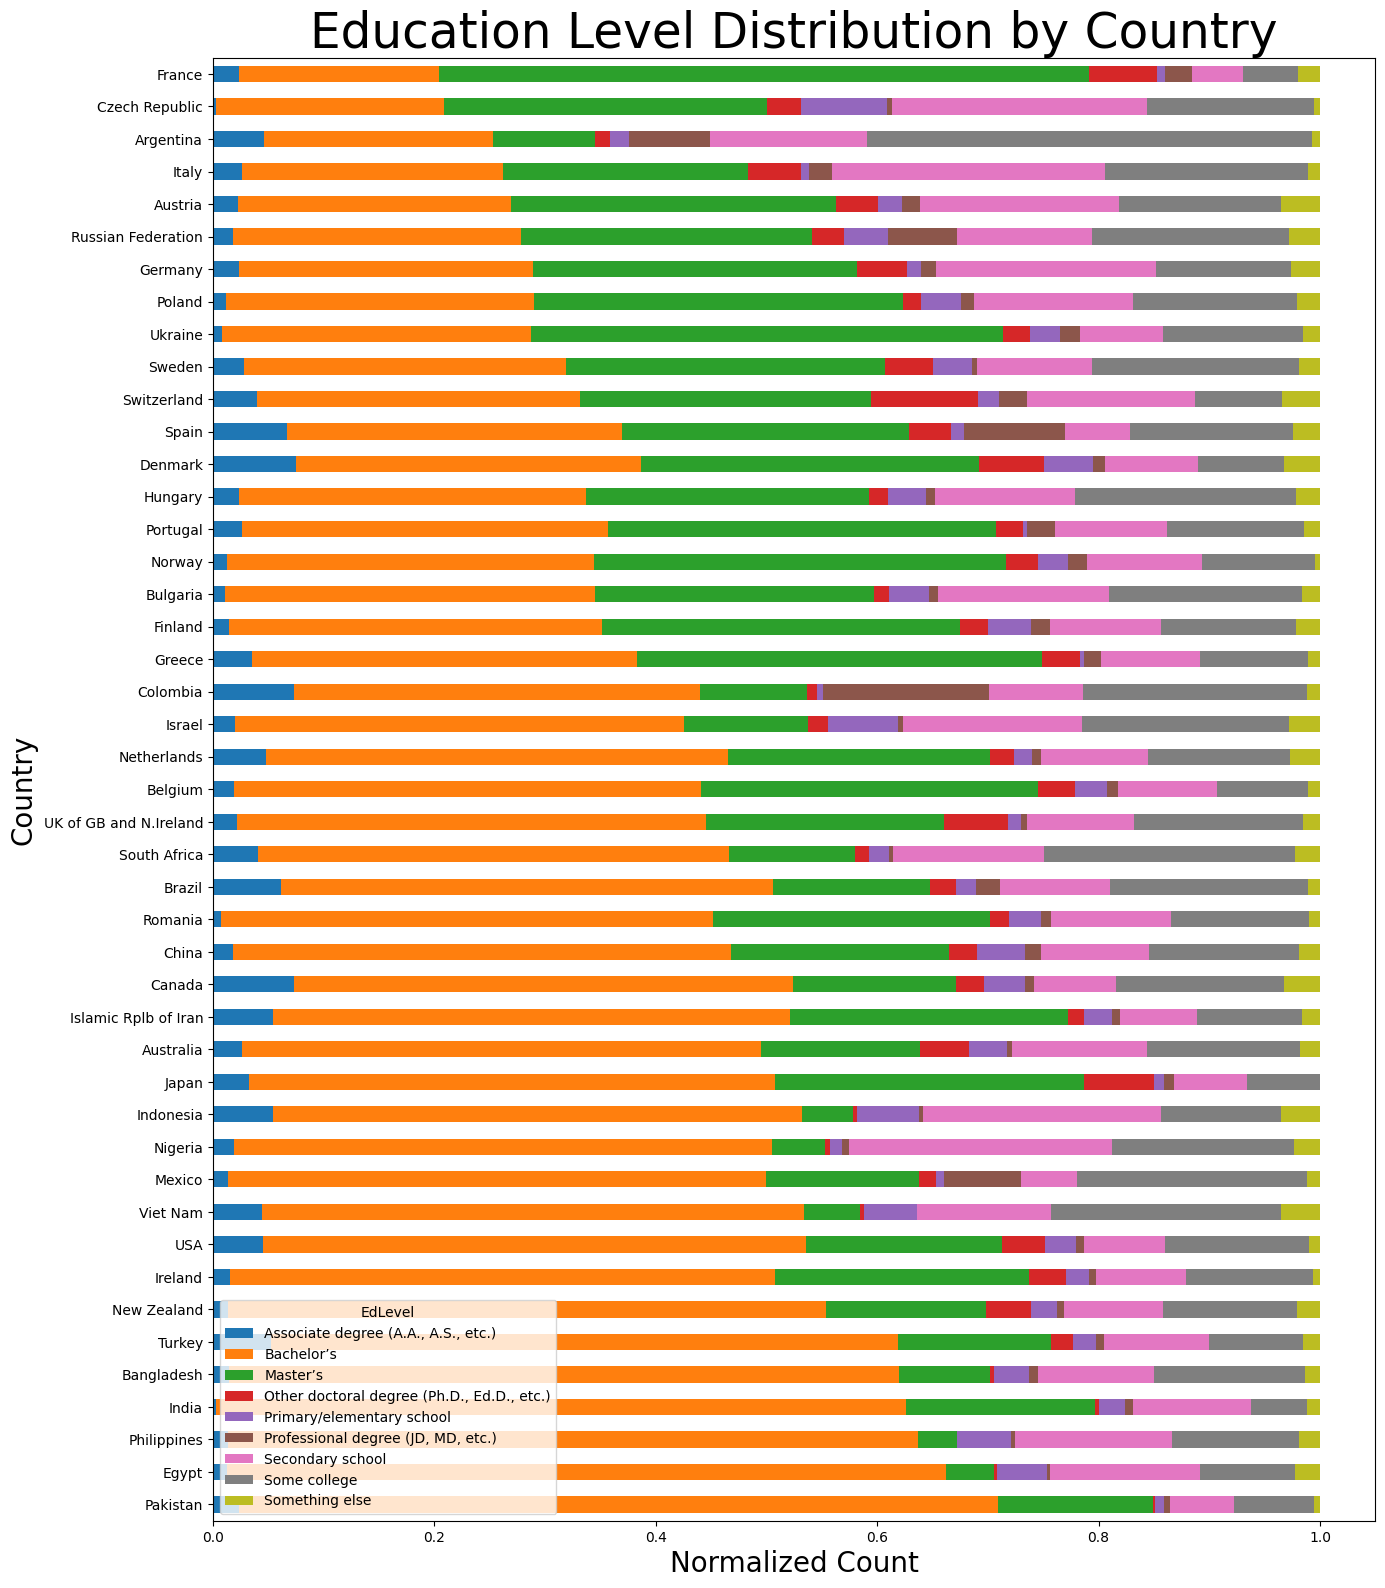

In [19]:
# Group by country:
country_grp = df_whole_45.groupby(['Country'])

# get percent of Education Level for each country
country_grp['EdLevel'].value_counts(normalize = True)

# Turn into a stacked bar chart

# unstack series into a dataframe 
edlevel_counts = country_grp['EdLevel'].value_counts(normalize=True)
edlevel_counts = edlevel_counts.unstack()

# adjustments for athstetics
edlevel_counts.rename(columns={'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school'}, inplace=True)
edlevel_counts.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK of GB and N.Ireland'}, inplace=True)
#edlevel_counts = edlevel_counts.sort_index(ascending=False)
#Sort the countries based on the size of the normalized "Bachelor's" column
edlevel_counts = edlevel_counts.sort_values(by="Bachelor’s", ascending=False)

#----OPTION TO ADJUST HOW YOU SEE FIT----- (uncomment out any '###' and re-run cell)
# Sort the countries based on the size of the normalized "Associate degree (A.A., A.S., etc.)" column
###edlevel_counts = edlevel_counts.sort_values(by='Associate degree (A.A., A.S., etc.)', ascending=False)

# Sort the countries based on the size of the normalized "Bachelor’s" column
###edlevel_counts = edlevel_counts.sort_values(by='Bachelor’s', ascending=False)

# Sort the countries based on the size of the normalized "Master’s" column
###edlevel_counts = edlevel_counts.sort_values(by='Master’s', ascending=False)

# Sort the countries based on the size of the normalized "Other doctoral degree (Ph.D., Ed.D., etc.)" column
###edlevel_counts = edlevel_counts.sort_values(by='Other doctoral degree (Ph.D., Ed.D., etc.)', ascending=False)

# Sort the countries based on the size of the normalized "Primary/elementary school" column
###edlevel_counts = edlevel_counts.sort_values(by='Primary/elementary school', ascending=False)

# Sort the countries based on the size of the normalized "Professional degree (JD, MD, etc.)" column
###edlevel_counts = edlevel_counts.sort_values(by='Professional degree (JD, MD, etc.)', ascending=False)

# Sort the countries based on the size of the normalized "Secondary school" column
###edlevel_counts = edlevel_counts.sort_values(by='Secondary school', ascending=False)

# Sort the countries based on the size of the normalized "Some college" column
###edlevel_counts = edlevel_counts.sort_values(by='Some college', ascending=False)




# Plot the stacked bar chart with inverted axes and adjusted dimensions
edlevel_counts.plot.barh(stacked=True, figsize=(15, 19))

# Add labels and title
plt.ylabel('Country', fontsize=20)
plt.xlabel('Normalized Count', fontsize=20)
plt.title('Education Level Distribution by Country', fontsize=35)

# Display the chart
##plt.show()



The analysis of this salary data brings forth intriguing insights while shedding light on deep-rooted stereotypes. However, it is crucial to critically examine the quality and reliability of this dataset, as it unveils two significant flaws that warrant attention.

Firstly, the dataset primarily originates from a platform that is rapidly becoming outdated with the emergence of AI language models like ChatGPT and code completion tools such as GitHub Copilot. This platform, despite its initial appearance of inclusivity, is constrained by stringent posting rules and restricted access to asking new questions or building upon existing ones, limited only to those who have amassed sufficient points. Consequently, while it serves as a valuable repository of general and specific knowledge, it falls short of being an open and welcoming space for individuals seeking assistance. My own experience and observations lead me to believe that few young people will continue utilizing this platform or feel motivated to become members. Moreover, the restriction to English as the sole permissible language on Stack Overflow perpetuates a bias towards privileged, highly educated individuals predominantly from English-speaking countries, further distorting the data.

Secondly, the presence of evident inaccuracies in answers, particularly concerning salary information, raises questions about the motives behind providing honest responses. These discrepancies cast doubt on the integrity of the dataset and highlight the need for caution when interpreting the findings derived from it.

By acknowledging these shortcomings, we are compelled to critically examine the validity and generalizability of any insights drawn from this dataset. It serves as a reminder that when relying on such sources, we must exercise discernment and consider the broader context to arrive at a more comprehensive understanding.

# Evaluation of Mental Health and Work Culture 

### This section provides an overview of the findings from the survey questions that covered mental health, DevOps culture, and combines them with certain general demographics.

    - look at mental health for the entier survey population
    - how do mental health and Devops corrolate
    - how do Education level and Devops corrolate


NOTE: **Very important!** Answers to Devops questions have been adjusted to be binary. These exchanges were made in the evaluation notebook {'Neither agree nor disagree': np.nan}) and ({'Strongly agree': 'Agree', 'Agree': 'Agree', 'Disagree': 'Disagree', 'Strongly disagree': 'Disagree'})

NOTE: for this section to work and look clean I may need to create a DF_mental. 

Note2: For this section I do need to run the **get_grouped_df** and **highlight_min_max function** from the Stack Overflow **Data Analysis, Whole** notebook. 

Todo:
-update column names for Devops to be consistant in appearance


In [20]:
def get_grouped_df(df, groupby_column, columns_to_group):
    # Create a new dataframe to store the grouped values
    grouped_df = pd.DataFrame(columns=columns_to_group)

    # Group the data by the specified column
    grouped = df.groupby(groupby_column)

    # Loop over each column to group
    for col in columns_to_group:
        # Get the value counts for each group and normalize the values
        counts = grouped[col].value_counts(normalize=True)[:, 'Agree']
        # Add the counts to the new dataframe
        grouped_df[col] = counts

    # Reset the index of the new dataframe
    grouped_df = grouped_df.reset_index()

    return grouped_df

# Resuable function to group a dataframe by a specific column, and return a new data frame
# with only the specified columns that have been normalized for the percentage of individuals in that group who decaaired 'Agree'.

In [21]:
def highlight_min_max(column):
    """
    Highlight the maximum and minimum values in a Pandas series
    """
    # find the maximum and minimum values in the series
    max_val = column.max()
    min_val = column.min()

    # create an empty list to store the style information for each value
    styles = []
    for value in column:
        # if the value is the maximum, add the 'max' style to the list
        if value == max_val:
            styles.append('background-color: blue; color: white')
        # if the value is the minimum, add the 'min' style to the list
        elif value == min_val:
            styles.append('background-color: red; color: white')
        # if the value is neither the maximum nor minimum, add an empty style to the list
        else:
            styles.append('')
    # return a Series of style information for each value in the input series
    return pd.Series(styles, index=column.index)

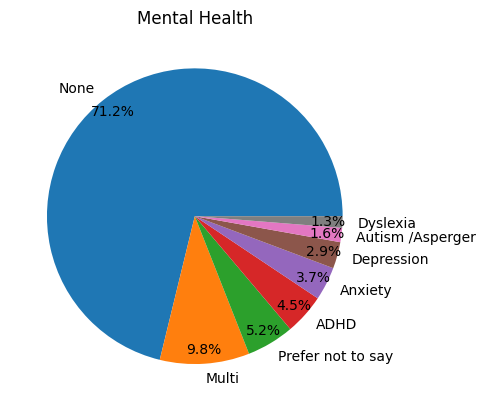

Participation in Mental Health question is: 66198 / 71331


In [22]:
# create the series
s = df_whole['MentalHealth'].value_counts()

# Get value counts without the "in your own words" category
s.drop("Or, in your own words:", inplace=True)

# plot as a pie chart
plt.pie(s, labels=s.index, autopct='%1.1f%%', pctdistance=.9)
plt.title('Mental Health')
plt.show()

# Recording participation: 
x = df_whole['MentalHealth'].count()
y = len(df_whole)

print(f'Participation in Mental Health question is: {x} / {y}')


In [23]:
grouped_df_country2 = df_whole_45_dev.groupby(['Country'])
grouped_df_country2['MentalHealth'].value_counts(normalize = True).head(45)

# Calculate the value counts for each MentalHealth label per Country
count_df = grouped_df_country2['MentalHealth'].value_counts().unstack(fill_value=0)

# Reset the index to convert Country from index to a column
count_df = count_df.reset_index()


# Set "Country" as the index of the DataFrame
count_df = count_df.set_index('Country')

# Calculate the sum of values for each country
country_sums = count_df.sum(axis=1)

# Normalize the values in each column based on the country sums and multiply by 100
normalized_df = count_df.div(country_sums + 1e-9, axis=0) * 100


# Format the normalized values with two decimal places and include the percent symbol
#normalized_df = normalized_df.applymap("{:.2f}%".format)

# Round the values to a specified number of decimal places
decimal_places = 2  # Specify the number of decimal places you want to keep
normalized_df = normalized_df.round(decimal_places)

# Print the normalized DataFrame
#print(normalized_df)


# apply the function to the DataFrame and display it
normalized_df.style.apply(highlight_min_max)

MentalHealth,ADHD,Anxiety,Autism /Asperger,Depression,Dyslexia,Multi,None,"Or, in your own words:",Prefer not to say
Country,,,,,,,,,
Argentina,2.440000,4.070000,0.610000,2.240000,0.410000,4.270000,79.470000,1.220000,5.280000
Australia,4.680000,4.170000,2.850000,2.780000,0.800000,11.850000,67.080000,0.950000,4.830000
Austria,3.680000,1.710000,0.790000,2.760000,0.920000,5.130000,78.290000,0.790000,5.920000
Bangladesh,2.930000,3.850000,0.180000,2.930000,1.470000,6.780000,73.810000,0.180000,7.880000
Belgium,3.940000,2.230000,3.770000,1.710000,3.250000,9.760000,68.660000,2.050000,4.620000
Brazil,4.330000,8.260000,1.440000,2.840000,0.350000,15.230000,63.760000,0.900000,2.890000
Bulgaria,1.470000,3.540000,0.290000,1.770000,0.590000,5.010000,84.660000,0.590000,2.060000
Canada,6.930000,4.370000,1.130000,2.940000,0.780000,13.600000,63.750000,0.610000,5.890000
China,2.740000,3.470000,0.730000,2.740000,1.460000,5.470000,73.720000,0.550000,9.120000


In [24]:
grouped_df_mental = get_grouped_df(df_whole, 'MentalHealth', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])



#setting index for aesthetics
grouped_df_mental.set_index("MentalHealth", inplace=True)
grouped_df_mental.style.apply(highlight_min_max)

,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
MentalHealth,,,,,,,
ADHD,0.914450,0.583765,0.697158,0.784331,0.849180,0.689716,0.759897
Anxiety,0.885522,0.580348,0.672962,0.781437,0.861682,0.699050,0.741903
Autism /Asperger,0.900000,0.591772,0.688679,0.721713,0.839437,0.587859,0.725076
Depression,0.871073,0.564168,0.643979,0.744032,0.825983,0.669355,0.709719
Dyslexia,0.932468,0.591362,0.726444,0.746224,0.853801,0.720779,0.748428
Multi,0.878697,0.614715,0.650020,0.716935,0.819213,0.709283,0.761868
None,0.919975,0.559593,0.738235,0.830704,0.905161,0.676348,0.681860
"Or, in your own words:",0.892000,0.652632,0.665049,0.797980,0.859155,0.695238,0.740385
Prefer not to say,0.896283,0.640712,0.686108,0.774332,0.857567,0.686469,0.747872


In [25]:
grouped_df_ed = get_grouped_df(df_whole, 'EdLevel', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])


#setting index for aesthetics
grouped_df_ed.set_index('EdLevel', inplace=True)
# apply the function to the DataFrame and display it
grouped_df_ed.style.apply(highlight_min_max)

,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
EdLevel,,,,,,,
Associate,0.908012,0.595899,0.697400,0.785143,0.884324,0.694132,0.736967
Bachelor’s,0.910399,0.580804,0.723837,0.811721,0.884457,0.688996,0.716966
Doctoral,0.926758,0.603960,0.686624,0.803238,0.883991,0.641060,0.608640
Juris Doctor,0.891089,0.544737,0.758782,0.849776,0.915433,0.735294,0.727960
Master’s,0.921197,0.580898,0.723543,0.800613,0.883270,0.663304,0.680420
Primary/Elementary,0.855556,0.517483,0.718121,0.816456,0.863095,0.729730,0.705882
Secondary school,0.887193,0.518082,0.682616,0.811292,0.900285,0.681818,0.697284
Some college,0.905601,0.535105,0.716413,0.815814,0.895579,0.678073,0.696785
Something else,0.891026,0.604167,0.685259,0.814961,0.888087,0.723404,0.748062


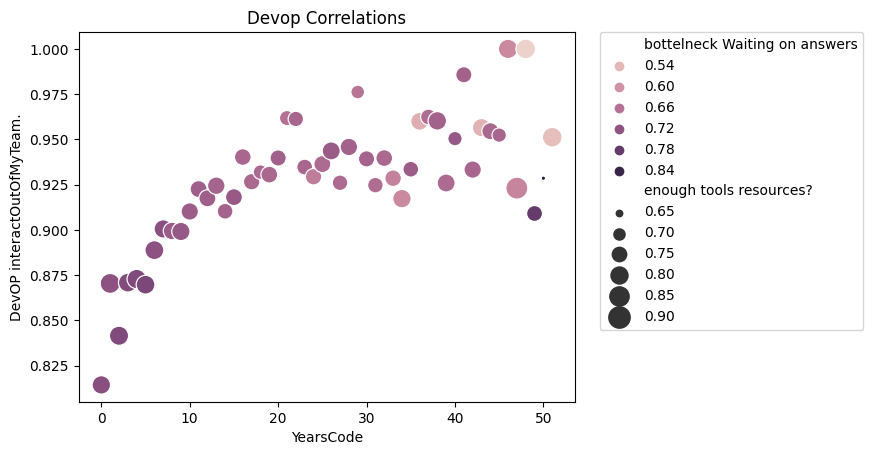

In [26]:
df_whole.dropna(subset=['YearsCode'], inplace=True)

#change data type to int
df_whole['YearsCode'] = pd.to_numeric(df_whole['YearsCode'], errors='coerce').astype('Int64')

grouped_df_YearsCode = get_grouped_df(df_whole, 'YearsCode', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])
# SORTING BY YEARS CODE
grouped_df_YearsCode.sort_values('YearsCode')


## Turn this in to a few scatter plots instead:
sns.scatterplot(x = "YearsCode", y = 'DevOP interactOutOfMyTeam.', data = grouped_df_YearsCode, hue = 'bottelneck Waiting on answers', size = 'enough tools resources?',sizes=(10, 250) )

plt.title('Devop Correlations')

# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [27]:
#want to add country vers devop

In [28]:
#want to add 


# References on the Percentage of Women in the Tech Industry:

    1.National Center for Women & Information Technology (NCWIT): NCWIT produces research and data related to women's participation in computing and technology. You can find their reports and statistics on their website: https://www.ncwit.org/

    2.Eurostat: Eurostat is the statistical office of the European Union, and they provide data and reports on various topics, including the ICT sector and gender representation. You can find their data on the ICT sector and employment by gender on their website: https://ec.europa.eu/eurostat

    3.World Economic Forum (WEF): The WEF publishes an annual report called the Global Gender Gap Report that examines gender disparities across various sectors, including technology. The report provides insights into gender gaps in different countries and industries. You can find the report on the WEF website: https://www.weforum.org/reports/global-gender-gap-report-2020  )

# Refernce 

    4. https://survey.stackoverflow.co/2022/#methodology-general
    